# Packages Imports

In [1]:
import pandas as pd
import numpy as np

import dask.dataframe as dd

from openTSNE import TSNE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading and Concatenating Dataset

In [2]:
INSIDER_SENARIOS = {
    0: 'Normal',
    1: 'Leaking Data',
    2: 'Churning Employee',
    3: 'Key Logging',
}

In [3]:
WEEK_DTYPE = {
    "afterhourhttp_leakf_mean_http_c_len": "float64",
    "afterhourhttp_leakf_mean_http_c_nwords": "float64",
    "afterhourhttp_leakf_mean_url_depth": "float64",
    "afterhourhttp_leakf_mean_url_len": "float64",
    "http_hackf_mean_http_c_len": "float64",
    "http_hackf_mean_http_c_nwords": "float64",
    "http_hackf_mean_url_depth": "float64",
    "http_hackf_mean_url_len": "float64",
    "http_leakf_mean_http_c_len": "float64",
    "http_leakf_mean_http_c_nwords": "float64",
    "http_leakf_mean_url_depth": "float64",
    "http_leakf_mean_url_len": "float64",
    "weekendhttp_leakf_mean_http_c_len": "float64",
    "weekendhttp_leakf_mean_http_c_nwords": "float64",
    "weekendhttp_leakf_mean_url_depth": "float64",
    "weekendhttp_leakf_mean_url_len": "float64",
    "workhourhttp_hackf_mean_http_c_len": "float64",
    "workhourhttp_hackf_mean_http_c_nwords": "float64",
    "workhourhttp_hackf_mean_url_depth": "float64",
    "workhourhttp_hackf_mean_url_len": "float64",
}

DAY_DTYPE = {
    "afterhourfile_compf_mean_file_depth": "float64",
    "afterhourfile_compf_mean_file_len": "float64",
    "afterhourfile_compf_mean_file_nwords": "float64",
    "afterhourfile_exef_mean_file_depth": "float64",
    "afterhourfile_exef_mean_file_len": "float64",
    "afterhourfile_exef_mean_file_nwords": "float64",
    "afterhourhttp_cloudf_mean_http_c_len": "float64",
    "afterhourhttp_cloudf_mean_http_c_nwords": "float64",
    "afterhourhttp_cloudf_mean_url_depth": "float64",
    "afterhourhttp_cloudf_mean_url_len": "float64",
    "afterhourhttp_jobf_mean_http_c_len": "float64",
    "afterhourhttp_jobf_mean_http_c_nwords": "float64",
    "afterhourhttp_jobf_mean_url_depth": "float64",
    "afterhourhttp_jobf_mean_url_len": "float64",
}

SESSION_DTYPE = {
    "http_hackf_mean_http_c_len": "float64",
    "http_hackf_mean_http_c_nwords": "float64",
    "http_hackf_mean_url_depth": "float64",
    "http_hackf_mean_url_len": "float64",
    "http_leakf_mean_http_c_len": "float64",
    "http_leakf_mean_http_c_nwords": "float64",
    "http_leakf_mean_url_depth": "float64",
    "http_leakf_mean_url_len": "float64",
}

In [4]:
FILES_PATHS = [
    "./r4.2/ExtractedData/sessionnact25r4.2.csv",
    "./r4.2/ExtractedData/sessionnact50r4.2.csv",
    "./r4.2/ExtractedData/sessionr4.2.csv",
    "./r4.2/ExtractedData/sessiontime120r4.2.csv",
    "./r4.2/ExtractedData/sessiontime240r4.2.csv",
]

In [5]:
# Create an Empty Dask DataFrame
full_ddf = dd.from_pandas(pd.DataFrame(), npartitions=10)

In [6]:
for file in FILES_PATHS:
    # Read the file
    ddf = dd.read_csv(file, dtype=SESSION_DTYPE)

    # Concatenate the balanced DataFrame with the full DataFrame
    full_ddf = dd.concat([full_ddf, ddf])

In [7]:
full_ddf = full_ddf.repartition(npartitions=10)

In [8]:
full_ddf.head()

,subs_ind,starttime,endtime,user,sessionid,day,week,pc,isworkhour,isafterhour,...,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords,insider
0,0.0,1.262423e+09,1.262445e+09,10,0,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,1.0,1.262446e+09,1.262456e+09,10,0,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,0.0,1.262421e+09,1.262434e+09,12,1,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,0.0,1.262435e+09,1.262450e+09,12,2,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,1.0,1.262451e+09,1.262451e+09,12,2,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [9]:
full_ddf.columns.tolist()

['subs_ind',
 'starttime',
 'endtime',
 'user',
 'sessionid',
 'day',
 'week',
 'pc',
 'isworkhour',
 'isafterhour',
 'isweekend',
 'isweekendafterhour',
 'n_days',
 'duration',
 'n_concurrent_sessions',
 'start_with',
 'end_with',
 'ses_start',
 'ses_end',
 'role',
 'b_unit',
 'f_unit',
 'dept',
 'team',
 'ITAdmin',
 'O',
 'C',
 'E',
 'A',
 'N',
 'n_allact',
 'n_logon',
 'n_usb',
 'usb_mean_usb_dur',
 'n_file',
 'file_mean_file_len',
 'file_mean_file_depth',
 'file_mean_file_nwords',
 'file_n-disk0',
 'file_n-disk1',
 'file_n-disk2',
 'file_n_otherf',
 'file_otherf_mean_file_len',
 'file_otherf_mean_file_depth',
 'file_otherf_mean_file_nwords',
 'file_otherf_n-disk0',
 'file_otherf_n-disk1',
 'file_otherf_n-disk2',
 'file_n_compf',
 'file_compf_mean_file_len',
 'file_compf_mean_file_depth',
 'file_compf_mean_file_nwords',
 'file_compf_n-disk0',
 'file_compf_n-disk1',
 'file_compf_n-disk2',
 'file_n_phof',
 'file_phof_mean_file_len',
 'file_phof_mean_file_depth',
 'file_phof_mean_file_

In [ ]:
full_ddf.isnull().sum().compute().to_dict()

{'subs_ind': 470611,
 'starttime': 0,
 'endtime': 0,
 'user': 0,
 'sessionid': 0,
 'day': 0,
 'week': 0,
 'pc': 0,
 'isworkhour': 0,
 'isafterhour': 0,
 'isweekend': 0,
 'isweekendafterhour': 0,
 'n_days': 0,
 'duration': 0,
 'n_concurrent_sessions': 0,
 'start_with': 0,
 'end_with': 0,
 'ses_start': 0,
 'ses_end': 0,
 'role': 0,
 'b_unit': 0,
 'f_unit': 0,
 'dept': 0,
 'team': 0,
 'ITAdmin': 0,
 'O': 0,
 'C': 0,
 'E': 0,
 'A': 0,
 'N': 0,
 'n_allact': 0,
 'n_logon': 0,
 'n_usb': 0,
 'usb_mean_usb_dur': 0,
 'n_file': 0,
 'file_mean_file_len': 0,
 'file_mean_file_depth': 0,
 'file_mean_file_nwords': 0,
 'file_n-disk0': 0,
 'file_n-disk1': 0,
 'file_n-disk2': 0,
 'file_n_otherf': 0,
 'file_otherf_mean_file_len': 0,
 'file_otherf_mean_file_depth': 0,
 'file_otherf_mean_file_nwords': 0,
 'file_otherf_n-disk0': 0,
 'file_otherf_n-disk1': 0,
 'file_otherf_n-disk2': 0,
 'file_n_compf': 0,
 'file_compf_mean_file_len': 0,
 'file_compf_mean_file_depth': 0,
 'file_compf_mean_file_nwords': 0,
 'fi

In [8]:
full_value_counts =  full_ddf.insider.value_counts(dropna=False).compute()
full_value_counts

0    5783459
2      10463
1        431
3        216
Name: insider, dtype: int64

In [16]:
full_value_counts.index

Int64Index([0, 2, 1, 3], dtype='int64')

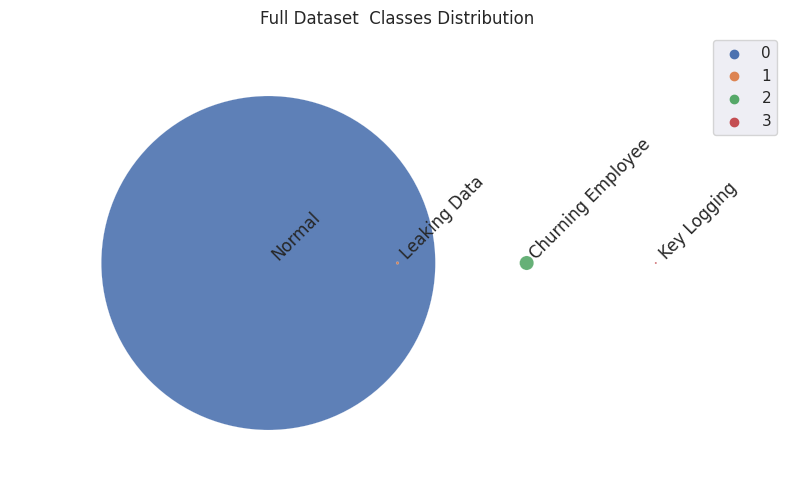

In [19]:
# X and Y coordinates
x_coords = full_value_counts.index
y_coords = [1] * len(full_value_counts)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=x_coords,
    y=y_coords,
    s=full_value_counts.values // 100,
    alpha=0.9,
    palette="deep",
    hue=full_value_counts.index,
    legend="full",
)

# Adding labels to each bubble
for idx, i in enumerate(full_value_counts.index):
    plt.text(
        x_coords[idx],
        y_coords[idx],
        INSIDER_SENARIOS[i],
        horizontalalignment="left",
        verticalalignment="bottom",
        rotation=45,
    )

# Adding labels for clarity
plt.axis("off")
plt.xlim(-2, len(full_value_counts))
plt.title("Full Dataset  Classes Distribution")

plt.show()

In [ ]:
full_ddf.to_parquet("./r4.2/ExtractedData/sessionr4.2")

# Sampling Dataset

In [20]:
# Create an Empty Dask DataFrame
balanced_ddf = dd.from_pandas(pd.DataFrame(), npartitions=5)
benign_ddf = dd.from_pandas(pd.DataFrame(), npartitions=5)
insider_ddf = dd.from_pandas(pd.DataFrame(), npartitions=5)

In [21]:
for file in FILES_PATHS:
    # Read the file
    ddf = dd.read_csv(file, dtype=SESSION_DTYPE)

    # Filter the majority class (class 0) and take a sample
    benign_sample = ddf[ddf["insider"] == 0].sample(frac=0.1)

    # Filter the insider classes from the original DataFrame
    insider_classes = ddf[ddf["insider"] != 0]

    # Concatenate the sampled majority class with the other classes
    final_ddf = dd.concat([benign_sample, insider_classes])

    # Concatenate the final_ddf DataFrame with the balanced DataFrame
    balanced_ddf = dd.concat([balanced_ddf, final_ddf])

    # Concatenate the benign class with the benign DataFrame
    benign_ddf = dd.concat([benign_ddf, ddf[ddf["insider"] == 0]])

    # Concatenate the insider class with the insider DataFrame
    insider_ddf = dd.concat([insider_ddf, insider_classes])

In [22]:
balanced_value_counts = balanced_ddf.insider.value_counts().compute()
balanced_value_counts

0    578348
2     10463
1       431
3       216
Name: insider, dtype: int64

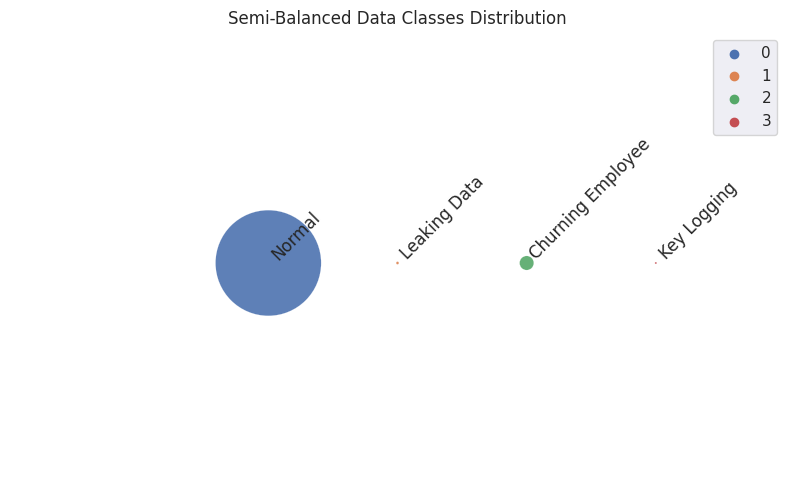

In [24]:
# X and Y coordinates
x_coords = balanced_value_counts.index
y_coords = [1] * len(balanced_value_counts)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=x_coords,
    y=y_coords,
    s=balanced_value_counts.values // 100,
    alpha=0.9,
    palette="deep",
    hue=balanced_value_counts.index,
    legend="full",
)

# Adding labels to each bubble
for idx, i in enumerate(balanced_value_counts.index):
    plt.text(
        x_coords[idx],
        y_coords[idx],
        INSIDER_SENARIOS[i],
        horizontalalignment="left",
        verticalalignment="bottom",
        rotation=45,
    )


# Adding labels for clarity
plt.axis("off")
plt.xlim(-2, len(balanced_value_counts))
plt.title("Semi-Balanced Data Classes Distribution")

plt.show()

In [ ]:
balanced_ddf.to_parquet("./r4.2/ExtractedData/sessionr4.2_balanced")

benign_ddf.to_parquet("./r4.2/ExtractedData/sessionr4.2_benign")

insider_ddf.to_parquet("./r4.2/ExtractedData/sessionr4.2_insider")

# EDA

In [ ]:
def show_features_skewness(data, columns=None, plot_grid_cols=4):
    if columns is None: columns = data.columns
     
    plot_grid_rows = int(np.ceil(len(columns) / plot_grid_cols))

    fig, axes = plt.subplots(plot_grid_rows, plot_grid_cols, figsize=(20, 100), sharex=False)
    
    for i, column in enumerate(columns):
        row, col = divmod(i, plot_grid_cols)
        sns.kdeplot(data[column], ax=axes[row, col])
        skewness = data[column].skew()
        axes[row, col].text(
            x=0.97, y=0.97, transform=axes[row, col].transAxes,
            s=f'Skewness: {skewness:.7f}',
            fontweight='demibold', fontsize=12, verticalalignment='top',
            horizontalalignment='right', backgroundcolor='white',
            color='xkcd:poo brown',
        )
        
    for i in range(len(columns), plot_grid_rows * plot_grid_cols):
        fig.delaxes(axes.ravel()[i])

    plt.tight_layout()
    plt.show()


In [ ]:
cert_full.head()

,subs_ind,starttime,endtime,user,sessionid,day,week,pc,isworkhour,isafterhour,...,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords,insider
0,0.0,1.262423e+09,1.262445e+09,10,0,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,1.0,1.262446e+09,1.262456e+09,10,0,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,0.0,1.262421e+09,1.262434e+09,12,1,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,0.0,1.262435e+09,1.262450e+09,12,2,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,1.0,1.262451e+09,1.262451e+09,12,2,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [ ]:
cert_full.describe().compute().transpose()

,count,mean,std,min,25%,50%,75%,max
subs_ind,5323958.0,1.499271e+00,1.619959e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,1.700000e+01
starttime,5794569.0,1.283200e+09,1.242592e+07,1.262415e+09,1.274867e+09,1.285662e+09,1.297431e+09,1.305615e+09
endtime,5794569.0,1.283209e+09,1.242594e+07,1.262416e+09,1.274872e+09,1.285669e+09,1.297436e+09,1.305615e+09
user,5794569.0,5.031796e+02,2.883358e+02,0.000000e+00,2.640000e+02,5.130000e+02,7.610000e+02,9.990000e+02
sessionid,5794569.0,3.480072e+06,2.054675e+06,0.000000e+00,2.103086e+06,3.901601e+06,5.805778e+06,7.201282e+06
day,5794569.0,2.453522e+02,1.438186e+02,5.000000e+00,1.490000e+02,2.740000e+02,4.100000e+02,5.050000e+02
week,5794569.0,3.476759e+01,2.054903e+01,0.000000e+00,2.100000e+01,3.900000e+01,5.800000e+01,7.200000e+01
pc,5794569.0,8.194777e-02,3.868471e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
isworkhour,5794569.0,8.467456e-01,3.228959e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
isafterhour,5794569.0,1.324778e-01,2.990152e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.509434e-01,1.000000e+00


In [ ]:
cert_full["insider"].value_counts().compute()

0    5783459
2      10463
1        431
3        216
Name: insider, dtype: int64

In [ ]:
cert_balanced["insider"].value_counts().compute()

0    578348
2     10463
1       431
3       216
Name: insider, dtype: int64

C:\Users\debi\AppData\Local\Temp\ipykernel_21788\1071410926.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[column], ax=axes[row, col])
C:\Users\debi\AppData\Local\Temp\ipykernel_21788\1071410926.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[column], ax=axes[row, col])
C:\Users\debi\AppData\Local\Temp\ipykernel_21788\1071410926.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[column], ax=axes[row, col])
C:\Users\debi\AppData\Local\Temp\ipykernel_21788\1071410926.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[column], ax=axes[row, col])
C:\Users\debi\AppData\Local\Temp\ipykernel_21788\1071410926.py:10: UserWarning: 

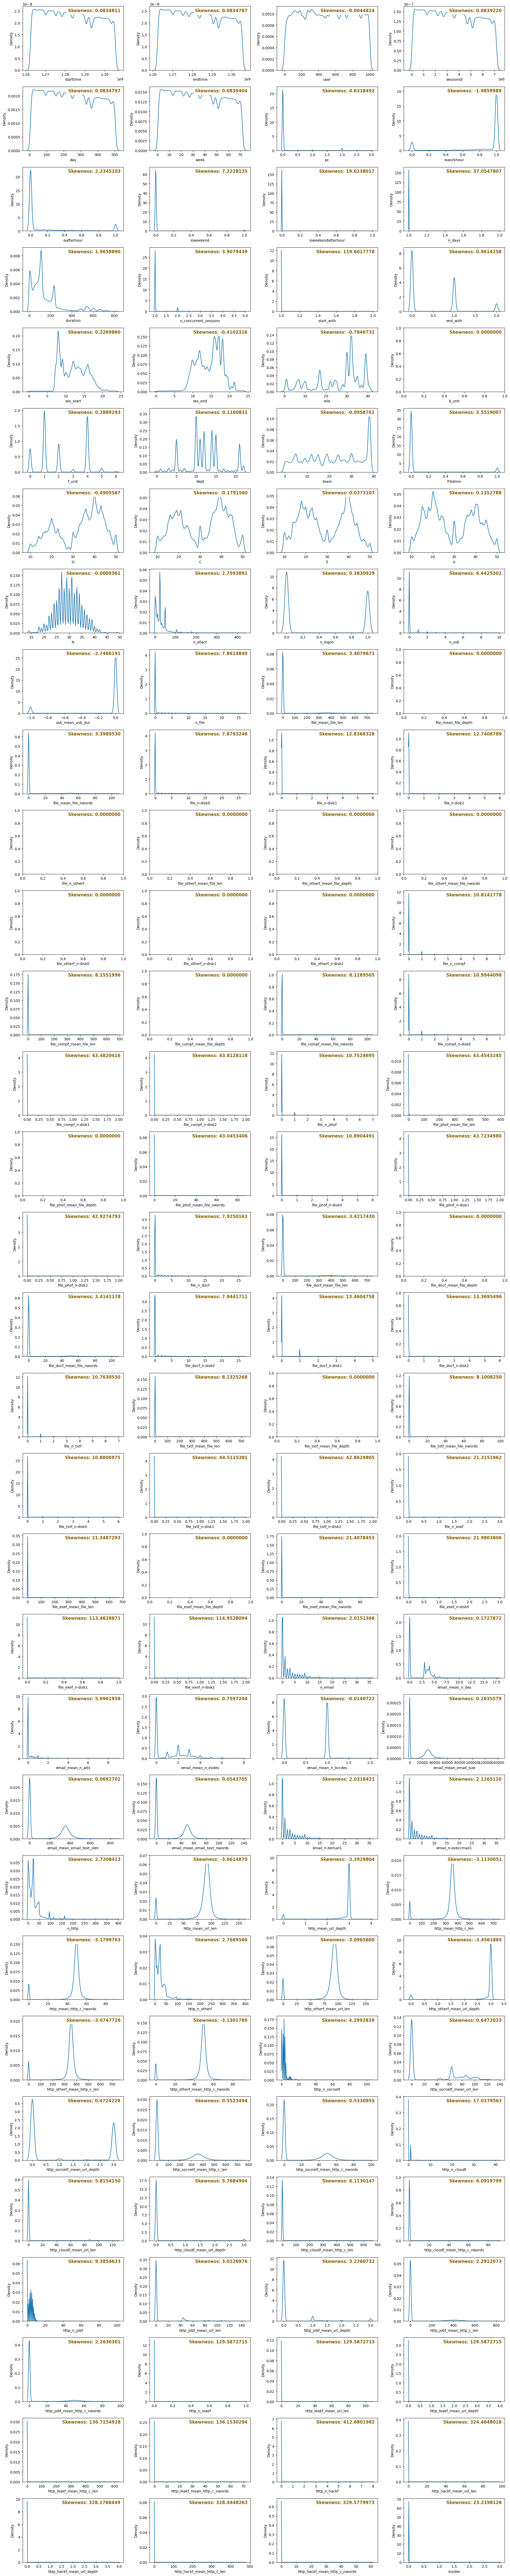

In [ ]:
show_features_skewness(full_df)

Many Features are constant (have no variance) or has one value across all records like (b_unit, file_mean_file_depth, file_n_otherf, file_otherf_mean_file_len,  file_otherf_mean_file_depth, file_otherf_mean_file_nwords, file_otherf_n-disk0). Some Features has very high +ive skewness like http features (http_n_hackf, http_hackf_mean_url_len, http_hackf_mean_url_depth & http_hackf_mean_http_c_len). Some other features has similar distribution to uniform distribution like (starttime, endtime, user, sessionid, day & week) & others has similar distribution to normal distribution like (http_otherf_mean_http_c_len, http_otherf_mean_http_c_nwords & http_mean_http_c_nwords).

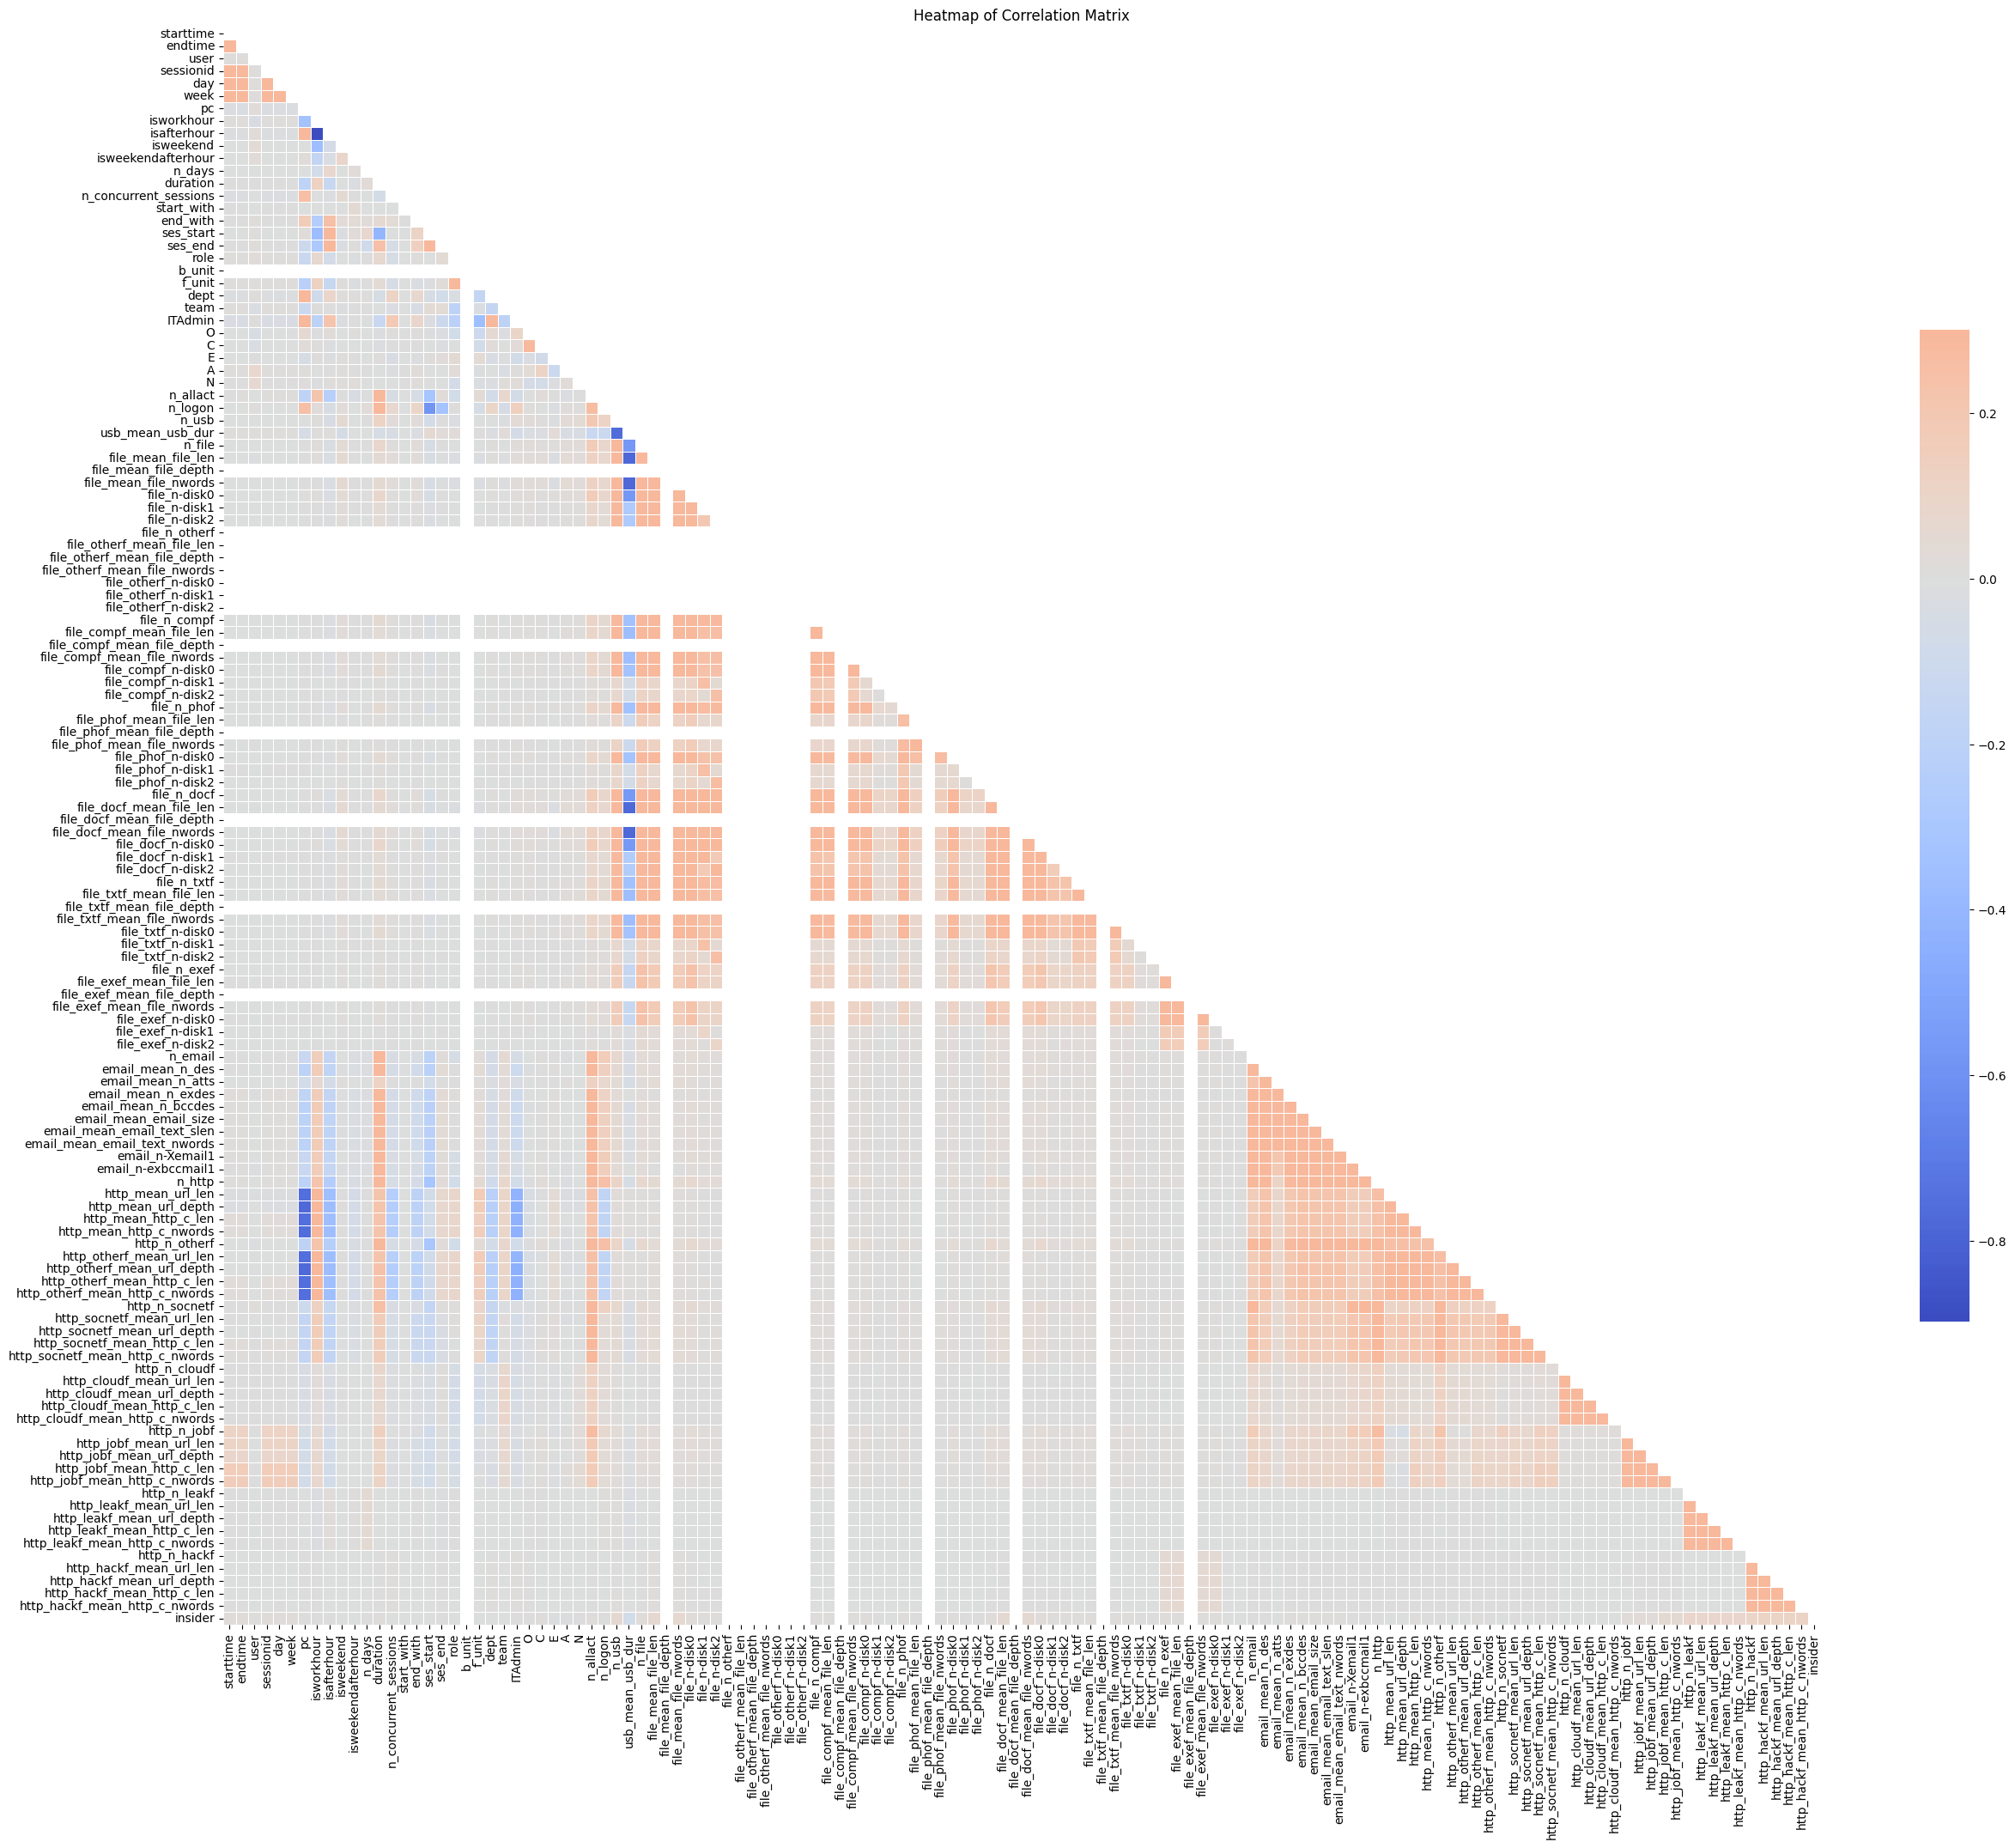

In [ ]:
corr_mat = full_df.corr()
diag_mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(30, 30))
sns.heatmap(corr_mat, mask=diag_mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Some Features doesn't change with the change in other features like (file_n_otherf, file_otherf_mean_file_len, file_otherf_mean_file_depth, file_otherf_mean_file_nwords, file_otherf_n-disk0, file_otherf_n-disk1 & file_otherf_n-disk2) some other features has high correlation like (http_mean_url_len, http_mean_url_depth, http_otherf_mean_url_len,http_otherf_mean_url_depth & pc) & (file_ndocf, file_docf_mean_file_len & n_file).


In [ ]:
cert_full.columns.to_list()

['subs_ind',
 'starttime',
 'endtime',
 'user',
 'sessionid',
 'day',
 'week',
 'pc',
 'isworkhour',
 'isafterhour',
 'isweekend',
 'isweekendafterhour',
 'n_days',
 'duration',
 'n_concurrent_sessions',
 'start_with',
 'end_with',
 'ses_start',
 'ses_end',
 'role',
 'b_unit',
 'f_unit',
 'dept',
 'team',
 'ITAdmin',
 'O',
 'C',
 'E',
 'A',
 'N',
 'n_allact',
 'n_logon',
 'n_usb',
 'usb_mean_usb_dur',
 'n_file',
 'file_mean_file_len',
 'file_mean_file_depth',
 'file_mean_file_nwords',
 'file_n-disk0',
 'file_n-disk1',
 'file_n-disk2',
 'file_n_otherf',
 'file_otherf_mean_file_len',
 'file_otherf_mean_file_depth',
 'file_otherf_mean_file_nwords',
 'file_otherf_n-disk0',
 'file_otherf_n-disk1',
 'file_otherf_n-disk2',
 'file_n_compf',
 'file_compf_mean_file_len',
 'file_compf_mean_file_depth',
 'file_compf_mean_file_nwords',
 'file_compf_n-disk0',
 'file_compf_n-disk1',
 'file_compf_n-disk2',
 'file_n_phof',
 'file_phof_mean_file_len',
 'file_phof_mean_file_depth',
 'file_phof_mean_file_

In [ ]:
cert_full.dtypes.to_dict()

{'subs_ind': dtype('float64'),
 'starttime': dtype('float64'),
 'endtime': dtype('float64'),
 'user': dtype('int64'),
 'sessionid': dtype('int64'),
 'day': dtype('int64'),
 'week': dtype('int64'),
 'pc': dtype('int64'),
 'isworkhour': dtype('float64'),
 'isafterhour': dtype('float64'),
 'isweekend': dtype('float64'),
 'isweekendafterhour': dtype('float64'),
 'n_days': dtype('int64'),
 'duration': dtype('float64'),
 'n_concurrent_sessions': dtype('int64'),
 'start_with': dtype('int64'),
 'end_with': dtype('int64'),
 'ses_start': dtype('float64'),
 'ses_end': dtype('float64'),
 'role': dtype('int64'),
 'b_unit': dtype('int64'),
 'f_unit': dtype('int64'),
 'dept': dtype('int64'),
 'team': dtype('int64'),
 'ITAdmin': dtype('int64'),
 'O': dtype('int64'),
 'C': dtype('int64'),
 'E': dtype('int64'),
 'A': dtype('int64'),
 'N': dtype('int64'),
 'n_allact': dtype('int64'),
 'n_logon': dtype('int64'),
 'n_usb': dtype('int64'),
 'usb_mean_usb_dur': dtype('float64'),
 'n_file': dtype('int64'),
 '

In [ ]:
low_cardinality_cols = []
for column in cert_full.columns:
    col_cardinality = len(cert_full[column].unique().compute())
    print(f"{column}: {col_cardinality}")
    if col_cardinality < 2:
        low_cardinality_cols.append(column)

subs_ind: 19
starttime: 2320400
endtime: 2364633
user: 1000
sessionid: 470611
day: 501
week: 73
pc: 4
isworkhour: 5760
isafterhour: 5765
isweekend: 1731
isweekendafterhour: 1741
n_days: 2
duration: 36673
n_concurrent_sessions: 5
start_with: 2
end_with: 3
ses_start: 1440
ses_end: 1440
role: 42
b_unit: 1
f_unit: 7
dept: 23
team: 39
ITAdmin: 2
O: 41
C: 41
E: 41
A: 41
N: 30
n_allact: 365
n_logon: 2
n_usb: 11
usb_mean_usb_dur: 18
n_file: 28
file_mean_file_len: 19176
file_mean_file_depth: 1
file_mean_file_nwords: 4291
file_n-disk0: 28
file_n-disk1: 7
file_n-disk2: 7
file_n_otherf: 1
file_otherf_mean_file_len: 1
file_otherf_mean_file_depth: 1
file_otherf_mean_file_nwords: 1
file_otherf_n-disk0: 1
file_otherf_n-disk1: 1
file_otherf_n-disk2: 1
file_n_compf: 8
file_compf_mean_file_len: 1254
file_compf_mean_file_depth: 1
file_compf_mean_file_nwords: 268
file_compf_n-disk0: 8
file_compf_n-disk1: 3
file_compf_n-disk2: 3
file_n_phof: 8
file_phof_mean_file_len: 561
file_phof_mean_file_depth: 1
file_p

Multiple column have only single value. These should be removed.

In [ ]:
cert_full["isworkhour"].value_counts().compute()

1.000000    4251273
0.000000     598715
0.500000      34447
0.846154      34401
0.923077      28291
             ...   
0.721854          1
0.722488          1
0.722973          1
0.724719          1
0.006061          1
Name: isworkhour, Length: 5760, dtype: int64

In [ ]:
cert_full["isweekend"].value_counts().compute()

0.000000    5683997
1.000000      89316
0.500000       1008
0.666667        695
0.800000        658
             ...   
0.791209          1
0.791304          1
0.007874          1
0.019417          1
0.793651          1
Name: isweekend, Length: 1731, dtype: int64

In [ ]:
cert_full.isnull().sum().compute().to_dict()

{'subs_ind': 470611,
 'starttime': 0,
 'endtime': 0,
 'user': 0,
 'sessionid': 0,
 'day': 0,
 'week': 0,
 'pc': 0,
 'isworkhour': 0,
 'isafterhour': 0,
 'isweekend': 0,
 'isweekendafterhour': 0,
 'n_days': 0,
 'duration': 0,
 'n_concurrent_sessions': 0,
 'start_with': 0,
 'end_with': 0,
 'ses_start': 0,
 'ses_end': 0,
 'role': 0,
 'b_unit': 0,
 'f_unit': 0,
 'dept': 0,
 'team': 0,
 'ITAdmin': 0,
 'O': 0,
 'C': 0,
 'E': 0,
 'A': 0,
 'N': 0,
 'n_allact': 0,
 'n_logon': 0,
 'n_usb': 0,
 'usb_mean_usb_dur': 0,
 'n_file': 0,
 'file_mean_file_len': 0,
 'file_mean_file_depth': 0,
 'file_mean_file_nwords': 0,
 'file_n-disk0': 0,
 'file_n-disk1': 0,
 'file_n-disk2': 0,
 'file_n_otherf': 0,
 'file_otherf_mean_file_len': 0,
 'file_otherf_mean_file_depth': 0,
 'file_otherf_mean_file_nwords': 0,
 'file_otherf_n-disk0': 0,
 'file_otherf_n-disk1': 0,
 'file_otherf_n-disk2': 0,
 'file_n_compf': 0,
 'file_compf_mean_file_len': 0,
 'file_compf_mean_file_depth': 0,
 'file_compf_mean_file_nwords': 0,
 'fi

The column `subs_ind` contains multiple Nan values. These should be removed or imputed.

# Data Preprocessing

In [ ]:
low_cardinality_cols = [
    "b_unit",
    "file_mean_file_depth",
    "file_n_otherf",
    "file_otherf_mean_file_len",
    "file_otherf_mean_file_depth",
    "file_otherf_mean_file_nwords",
    "file_otherf_n-disk0",
    "file_otherf_n-disk1",
    "file_otherf_n-disk2",
    "file_compf_mean_file_depth",
    "file_phof_mean_file_depth",
    "file_docf_mean_file_depth",
    "file_txtf_mean_file_depth",
    "file_exef_mean_file_depth",
]

info_cols = ["subs_ind", "starttime", "endtime", "sessionid", "user", "day", "week"]

In [ ]:
for column in low_cardinality_cols + info_cols:
    cert_full = cert_full.drop(column, axis=1, errors='ignore')
    cert_benign = cert_benign.drop(column, axis=1, errors='ignore')
    cert_balanced = cert_balanced.drop(column, axis=1, errors='ignore')
    cert_insider = cert_insider.drop(column, axis=1, errors='ignore')

In [ ]:
cert_full.head()

,pc,isworkhour,isafterhour,isweekend,isweekendafterhour,n_days,duration,n_concurrent_sessions,start_with,end_with,...,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords,insider
0,0,0.0,0.0,1.000000,0.000000,1,368.616667,1,1,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0.777778,0.222222,1,175.933333,1,1,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,0,0.0,0.0,1.000000,0.000000,1,224.066667,1,1,2,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,0,0.0,0.0,1.000000,0.000000,1,254.716667,1,1,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,0,0.0,0.0,1.000000,0.000000,1,0.000000,1,1,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(cert_full.drop(['insider'], axis=1).compute(),
                                                    cert_full['insider'].compute(),
                                                    stratify=cert_full['insider'].compute(),
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4635655, 107), (1158914, 107), (4635655,), (1158914,))

In [ ]:
# Scale the data
X_train["duration"] = X_train["duration"] / X_train["duration"].max()
X_test["duration"] = X_test["duration"] / X_train["duration"].max()

In [ ]:
X_train.to_parquet("./r4.2/ExtractedData/X_train.parquet")
X_test.to_parquet("./r4.2/ExtractedData/X_test.parquet")
pd.DataFrame(y_train).to_parquet("./r4.2/ExtractedData/y_train.parquet")
pd.DataFrame(y_test).to_parquet("./r4.2/ExtractedData/y_test.parquet")

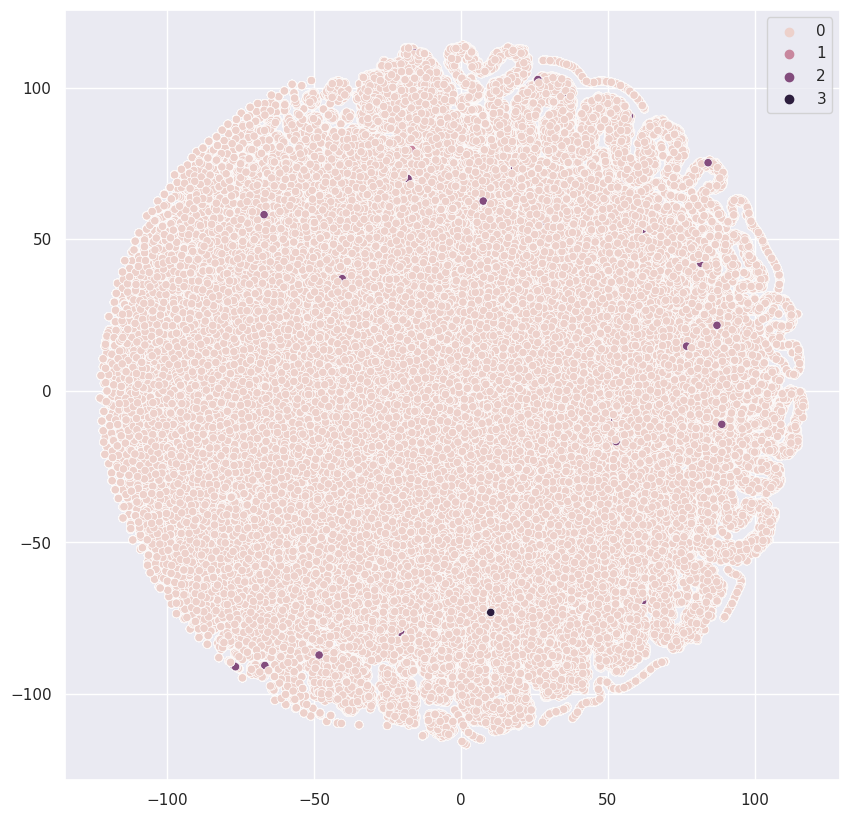

In [ ]:
# TSNE Plot
tsne = TSNE(
    perplexity=10,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

train_embeddings = tsne.fit(X_train.sample(1000000, random_state=42).to_numpy())


plt.figure(figsize=(10, 10))

sns.scatterplot(
    x=train_embeddings[:, 0],
    y=train_embeddings[:, 1],
    hue=y_train.sample(1000000, random_state=42).to_numpy().ravel(),
)
plt.show()

Looking at the TSNE plot above, we can see that the data is not linearly separable. So, we will use a non-linear model for classification. We used a 1,000,000 records sample.